# LA Airbnb Listings General Market Analysis

In [32]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [ ]:
# Read the LA Airbnb listings data to be able to preprocess it. 
search_path = Path.home()

# Search for the file.
matches = list(search_path.rglob('listing.csv'))

if matches: 
    csv_path = matches[0]
    listings_la = pd.read_csv(csv_path)
    print(f"File found at: {csv_path}")
else:
    print("listing.csv not found.")

File found at: /Users/ishapreetbhele/Documents/Rockborne_PromptEng/LA_Airbnb_Listings.csv


In [34]:
# Storing an Orignal Copy of the LA Airbnb Listings Dataset
orig_listings_data = listings_la.copy()

## Data Preprocessing

In [35]:
# Handling Hidden Nulls in the Data
listings_la.replace(['?','NULL','NA','','-'], np.nan, inplace=True)

In [36]:
# List of columns to drop
columns_to_drop = [
    'scrape_id',
    'last_scraped',
    'source',
    'neighborhood_overview',
    'host_url',
    'host_since',
    'host_location',
    'host_about',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_thumbnail_url',
    'host_picture_url',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood',
    'calendar_updated',
    'calendar_last_scraped',
    'number_of_reviews_l30d',
    'first_review',
    'license',
    'instant_bookable',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month'
]

# Drop irrelevant columns
listings_la.drop(columns=columns_to_drop, axis=1, inplace=True)

In [37]:
listings_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45031 entries, 0 to 45030
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45031 non-null  int64  
 1   listing_url                     45031 non-null  object 
 2   name                            45030 non-null  object 
 3   description                     43997 non-null  object 
 4   picture_url                     45031 non-null  object 
 5   host_id                         45031 non-null  int64  
 6   host_name                       44961 non-null  object 
 7   host_listings_count             44958 non-null  float64
 8   host_total_listings_count       44958 non-null  float64
 9   neighbourhood_cleansed          45031 non-null  object 
 10  neighbourhood_group_cleansed    45031 non-null  object 
 11  latitude                        45031 non-null  float64
 12  longitude                       

In [38]:
# Checking for duplicated rows of listings
listings_la.duplicated('id')

0        False
1        False
2        False
3        False
4        False
         ...  
45026    False
45027    False
45028    False
45029    False
45030    False
Length: 45031, dtype: bool

In [39]:
# Viewing nulls in the LA Airbnb Listings Data 
listings_la.isnull().sum()

id                                    0
listing_url                           0
name                                  1
description                        1034
picture_url                           0
host_id                               0
host_name                            70
host_listings_count                  73
host_total_listings_count            73
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                          9108
bathrooms_text                       28
bedrooms                           2994
beds                               9223
amenities                             0
price                              9164
minimum_nights                        0
maximum_nights                        0
minimum_minimum_nights               20


In [40]:
# Dropping null names, descriptions, bathrooms + bth_text, beds, price and estimated revenue l365 days
listings_la.dropna(subset=['name','description', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price','estimated_revenue_l365d'], inplace=True)

In [41]:
# Confirm nulls have been dropped
listings_la.isnull().sum()

id                                   0
listing_url                          0
name                                 0
description                          0
picture_url                          0
host_id                              0
host_name                           62
host_listings_count                 65
host_total_listings_count           65
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            0
bathrooms_text                       0
bedrooms                             0
beds                                 0
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
minimum_minimum_nights               0
maximum_minimum_nights   

In [42]:
# Dropping host_listings_count and host_total_listings_count columns as these have nulls 
# calculated_host_listings_count can be used by itself
listings_la.drop(columns=['host_listings_count','host_total_listings_count'], axis=1, inplace=True)


In [43]:
# Confirm the two columns have been dropped
listings_la.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35093 entries, 0 to 45030
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35093 non-null  int64  
 1   listing_url                     35093 non-null  object 
 2   name                            35093 non-null  object 
 3   description                     35093 non-null  object 
 4   picture_url                     35093 non-null  object 
 5   host_id                         35093 non-null  int64  
 6   host_name                       35031 non-null  object 
 7   neighbourhood_cleansed          35093 non-null  object 
 8   neighbourhood_group_cleansed    35093 non-null  object 
 9   latitude                        35093 non-null  float64
 10  longitude                       35093 non-null  float64
 11  property_type                   35093 non-null  object 
 12  room_type                       35093

In [44]:
# Creating occupancy rates for each listing
listings_la['occupancy_rate'] = (listings_la['estimated_occupancy_l365d'] / 365) * 100
listings_la['occupancy_rate'] = listings_la['occupancy_rate'].round(2)  


In [45]:
listings_la = listings_la[listings_la['availability_365'] > 0].copy()

listings_la['occupancy_rate_adjusted'] = (
    listings_la['estimated_occupancy_l365d'] / listings_la['availability_365']
) * 100


In [46]:
listings_la.head()

,id,listing_url,name,description,picture_url,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,occupancy_rate,occupancy_rate_adjusted
0,75212,https://www.airbnb.com/rooms/75212,Sunny Room only in town house nr Long Beach…,"A bright & sunny room ONLY with full size bed,...",https://a0.muscache.com/pictures/e3cff12f-d518...,343761,Kris,Lakewood,Other Cities,33.846500,...,4.84,4.92,4.91,4.95,4.96,4.89,4.83,1,11.51,12.727273
1,76561,https://www.airbnb.com/rooms/76561,420 Friendly Sweet Lil' Guesthouse by Sofi & LAX,-420 Friendly Airbnb Stay in LA!-<br />(16 to ...,https://a0.muscache.com/pictures/23627d22-d977...,403838,Jennifer,View Park-Windsor Hills,Unincorporated Areas,33.985220,...,4.83,4.85,4.68,4.95,4.94,4.70,4.79,4,69.86,187.500000
2,79502,https://www.airbnb.com/rooms/79502,Silver Lake million dollar view * luxe patio,"Walk to Sunset Junction, the Polka Dot triangl...",https://a0.muscache.com/pictures/miso/Hosting-...,428171,H.,Silver Lake,City of Los Angeles,34.082859,...,4.82,4.85,4.89,4.95,4.88,4.94,4.73,2,32.88,33.333333
4,80714,https://www.airbnb.com/rooms/80714,Cozy secluded Guesthouse in Garden,Sierra Bonita Guesthouse in Garden setting:<br...,https://a0.muscache.com/pictures/2080263/2d8a6...,436647,Cari,Mid-Wilshire,City of Los Angeles,34.057980,...,4.95,4.93,4.96,4.97,4.98,4.95,4.88,1,69.86,75.667656
7,229799,https://www.airbnb.com/rooms/229799,322 1 Bedroom Loft Nr UCLA &Buses On Westwood Bl,"Luxury 1 Bedroom loft totally private, full ki...",https://a0.muscache.com/pictures/miso/Hosting-...,3392276,Amir,West Los Angeles,City of Los Angeles,34.046820,...,4.51,4.63,4.53,4.93,4.88,4.88,4.43,48,65.75,142.857143


## Exploratory Data Analysis

### KPIs

In [47]:
listings_la.describe() # $14,545 estimated avg revenue per year, 21% annual occupancy rate on average, 80% adjusted occupancy rate

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,occupancy_rate,occupancy_rate_adjusted
count,3.484000e+04,3.484000e+04,34840.000000,34840.000000,34840.000000,34840.000000,34840.000000,34840.000000,34840.000000,34840.000000,...,25825.000000,25819.000000,25819.000000,25816.000000,25819.000000,25815.000000,25814.000000,34840.000000,34840.000000,34840.000000
mean,6.831793e+17,2.173284e+08,34.055377,-118.309244,4.224598,1.655683,1.788175,2.266418,16.719460,420.788863,...,4.793663,4.812186,4.768504,4.866066,4.867634,4.798802,4.715715,21.449024,20.815844,80.129628
std,5.330442e+17,2.076808e+08,0.150911,0.174223,2.956925,1.233590,1.354782,1.767598,22.175408,370.759321,...,0.395474,0.377965,0.403489,0.338752,0.344019,0.363886,0.422036,72.956575,24.793633,509.827724
min,2.708000e+03,7.670000e+02,33.338540,-118.907660,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,4.551020e+07,2.928117e+07,33.998100,-118.409578,2.000000,1.000000,1.000000,1.000000,2.000000,95.000000,...,4.750000,4.790000,4.710000,4.870000,4.880000,4.750000,4.660000,1.000000,0.000000,0.000000
50%,8.370926e+17,1.320621e+08,34.061463,-118.340729,4.000000,1.000000,1.000000,2.000000,7.000000,365.000000,...,4.910000,4.920000,4.890000,4.960000,4.970000,4.900000,4.820000,3.000000,9.860000,16.438356
75%,1.176902e+18,4.153910e+08,34.109999,-118.212863,6.000000,2.000000,2.000000,3.000000,30.000000,365.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,12.000000,36.160000,71.130026
max,1.366924e+18,6.812012e+08,34.811180,-117.653350,16.000000,47.500000,43.000000,50.000000,730.000000,3650.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,582.000000,69.860000,25500.000000


In [48]:
listings_la['estimated_revenue_l365d'].describe()


count     34840.000000
mean      14572.055023
std       27237.132224
min           0.000000
25%           0.000000
50%        4296.000000
75%       20160.000000
max      889020.000000
Name: estimated_revenue_l365d, dtype: float64

In [49]:
print(f"Average fixed occupancy rate: {listings_la['occupancy_rate'].mean():.2f}%")
print(f"Average adjusted occupancy rate: {listings_la['occupancy_rate_adjusted'].mean():.2f}%")


Average fixed occupancy rate: 20.82%
Average adjusted occupancy rate: 80.13%


In [50]:
occupancy_by_room_type = listings_la.groupby('room_type')[['occupancy_rate', 'occupancy_rate_adjusted']].mean().reset_index()
print(occupancy_by_room_type)

         room_type  occupancy_rate  occupancy_rate_adjusted
0  Entire home/apt       22.480703                86.963293
1       Hotel room        2.712598                 5.203329
2     Private room       15.882942                60.381460
3      Shared room       13.527119                28.510667


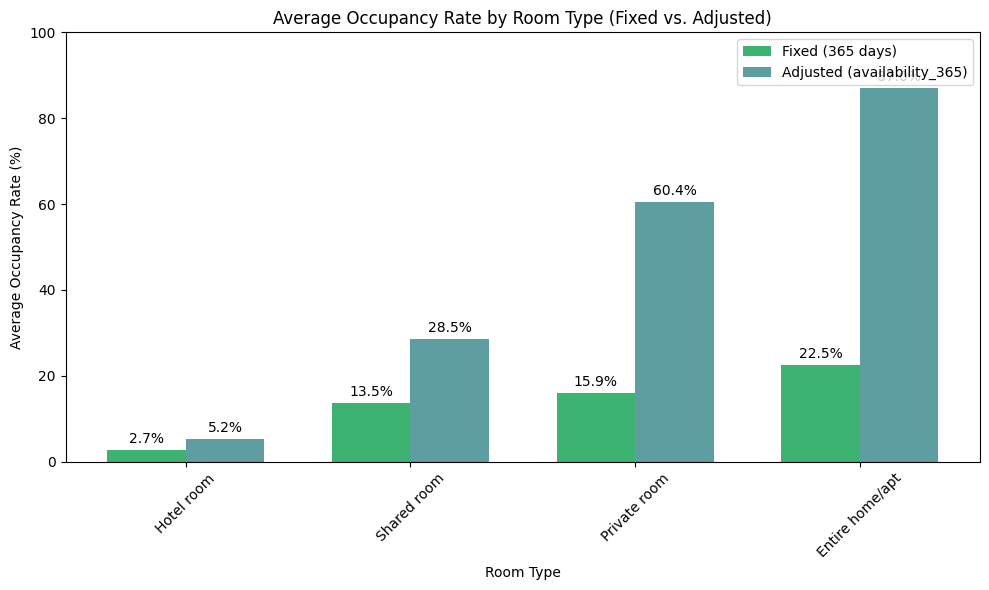

In [ ]:
# Group data by room type
occupancy_by_room_type = listings_la.groupby('room_type')[['occupancy_rate', 'occupancy_rate_adjusted']].mean().reset_index()

# Sort by adjusted occupancy for better visuals
occupancy_by_room_type = occupancy_by_room_type.sort_values('occupancy_rate_adjusted')

# Bar positions
x = np.arange(len(occupancy_by_room_type['room_type']))
width = 0.35  # width of each bar

# Plotting a bar chart to compare occupancy rate vs adjusted occupancy rate to determine which is more accurate/consistent with research
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, occupancy_by_room_type['occupancy_rate'], width, label='Fixed (365 days)', color='mediumseagreen')
bars2 = plt.bar(x + width/2, occupancy_by_room_type['occupancy_rate_adjusted'], width, label='Adjusted (availability_365)', color='cadetblue')

# Labels and title
plt.xlabel('Room Type')
plt.ylabel('Average Occupancy Rate (%)')
plt.title('Average Occupancy Rate by Room Type (Fixed vs. Adjusted)')
plt.xticks(x, occupancy_by_room_type['room_type'], rotation=45)
plt.ylim(0, 100)
plt.legend()

# Add labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [53]:
# Active Listing Counts KPI
kpi_data = {
    "Availability Window": ["30 days", "60 days", "90 days", "365 days"],
    "Active Listings": [
        listings_la[listings_la['availability_30'] > 0].shape[0],
        listings_la[listings_la['availability_60'] > 0].shape[0],
        listings_la[listings_la['availability_90'] > 0].shape[0],
        listings_la[listings_la['availability_365'] > 0].shape[0],
    ]
}

# Create DataFrame
kpi_table = pd.DataFrame(kpi_data)

# Display the table
print(kpi_table)

  Availability Window  Active Listings
0             30 days            28605
1             60 days            31169
2             90 days            32225
3            365 days            34840


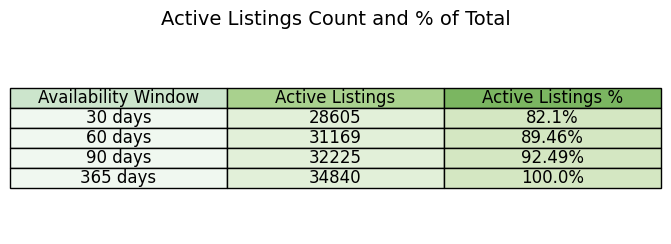

In [54]:
# Active Listings Count and Active Listings Rate KPI Table
total_listings = listings_la.shape[0]

kpi_data = {
    "Availability Window": ["30 days", "60 days", "90 days", "365 days"],
    "Active Listings": [
        listings_la[listings_la['availability_30'] > 0].shape[0],
        listings_la[listings_la['availability_60'] > 0].shape[0],
        listings_la[listings_la['availability_90'] > 0].shape[0],
        listings_la[listings_la['availability_365'] > 0].shape[0],
    ]
}

kpi_table = pd.DataFrame(kpi_data)
kpi_table['Active Listings %'] = (kpi_table['Active Listings'] / total_listings * 100).round(2).astype(str) + '%'

fig, ax = plt.subplots(figsize=(7, 2.5))
ax.axis('off')

col_header_colors = ['#cce5cc', '#a9d18e', '#7bb661']  # light to dark sage green
# Data column colors (light green for all data cells)
col_cell_colors = ['#f0f8f0', '#e2f0d9', '#d4e7c2']

table = ax.table(
    cellText=kpi_table.values,
    colLabels=kpi_table.columns,
    cellLoc='center',
    loc='center',
    colColours=col_header_colors
)

# Set data cell background colors row-wise (not built-in, so iterate)
for i in range(len(kpi_table)):
    for j in range(len(kpi_table.columns)):
        table[(i + 1, j)].set_facecolor(col_cell_colors[j % len(col_cell_colors)])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Active Listings Count and % of Total", fontsize=14, pad=12)
plt.show()


/var/folders/5n/hb8dzd1s6qqbhtyrmqsm6w000000gn/T/ipykernel_17048/2850877282.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


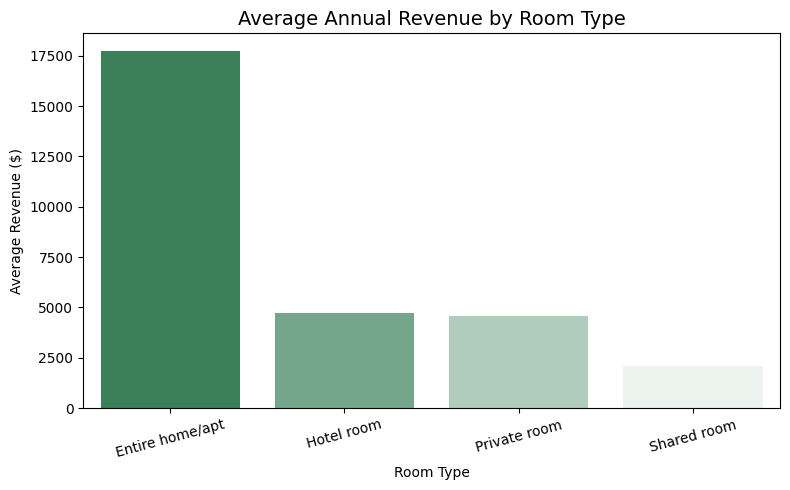

In [ ]:
# Graph to show Average Revenue of Room Type
# ---
# Group by room_type and calculate average estimated revenue
avg_revenue = listings_la.groupby('room_type')['estimated_revenue_l365d'].mean().reset_index()

# Sort room types by average revenue (descending)
avg_revenue = avg_revenue.sort_values(by='estimated_revenue_l365d', ascending=False)

# Create a custom sage green gradient palette
# We'll create a gradient from a lighter sage green to a darker sage green
palette = sns.light_palette("seagreen", n_colors=avg_revenue.shape[0], reverse=True)

# Plotting a bar chart to show average annual revenue by room type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_revenue,
    x='room_type',
    y='estimated_revenue_l365d',
    palette=palette
)

# Add labels and formatting
plt.title("Average Annual Revenue by Room Type", fontsize=14)
plt.xlabel("Room Type")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=15)

# Remove grid lines
plt.grid(False)

plt.tight_layout()
plt.show()



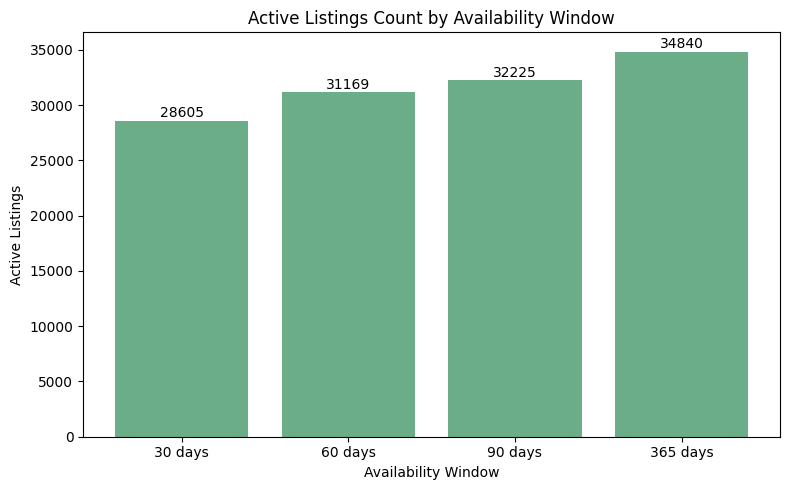

In [56]:
# Plotting bar chart for active listings count
plt.figure(figsize=(8, 5))
bars = plt.bar(kpi_table['Availability Window'], kpi_table['Active Listings'], color='seagreen', alpha=0.7)

plt.xlabel('Availability Window')
plt.ylabel('Active Listings')
plt.title('Active Listings Count by Availability Window')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

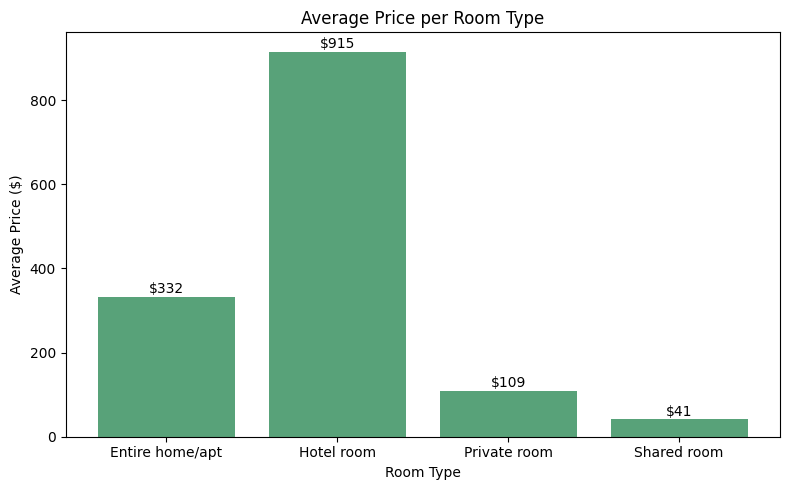

In [57]:
# Remove $ and commas, then convert to float
listings_la['price'] = listings_la['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by room type and calculate average price
avg_price = listings_la.groupby('room_type')['price'].mean().reset_index()

### Plotting a bar chart to show average night price per room type ###

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_price['room_type'], avg_price['price'], color='seagreen', alpha=0.8)

plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.title('Average Price per Room Type')

# Add price labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'${height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




In [58]:
# Filter for 'Entire home/apt' listings
entire_home = listings_la[listings_la['room_type'] == 'Entire home/apt']

# Calculate summary stats
avg_price = entire_home['price'].mean()
min_price = entire_home['price'].min()
max_price = entire_home['price'].max()

# Print or format nicely
print(f"Entire home/apt pricing:")
print(f"Average Price: ${avg_price:.2f}")
print(f"Lowest Price:  ${min_price:.2f}")
print(f"Highest Price: ${max_price:.2f}")


Entire home/apt pricing:
Average Price: $332.43
Lowest Price:  $10.00
Highest Price: $30000.00


In [59]:
price_summary = pd.DataFrame({
    'Metric': ['Average Price', 'Lowest Price', 'Highest Price'],
    'Price (USD)': [round(avg_price, 2), round(min_price, 2), round(max_price, 2)]
})

print(price_summary)

          Metric  Price (USD)
0  Average Price       332.43
1   Lowest Price        10.00
2  Highest Price     30000.00


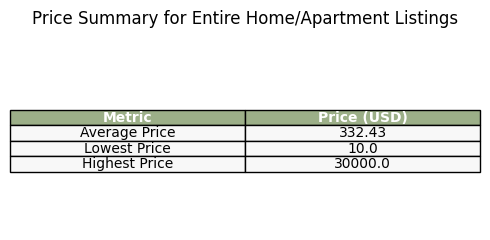

In [60]:
# Average, Lowest and Highest Night Price KPIs for Entire Home/Apartment Listings
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.axis('off')

table = ax.table(
    cellText=price_summary.values,
    colLabels=price_summary.columns,
    cellLoc='center',
    loc='center'
)

# Style header
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#9caf88')  # Sage green
    else:
        cell.set_facecolor('#f8f8f8')

plt.title('Price Summary for Entire Home/Apartment Listings', pad=20)
plt.tight_layout()
plt.show()


In [61]:
# Group by number of bedrooms and calculate average price
avg_price_by_bedrooms = listings_la.groupby('bedrooms')['price'].mean().reset_index()
avg_price_by_bedrooms.columns = ['Bedrooms', 'Average Price (USD)']


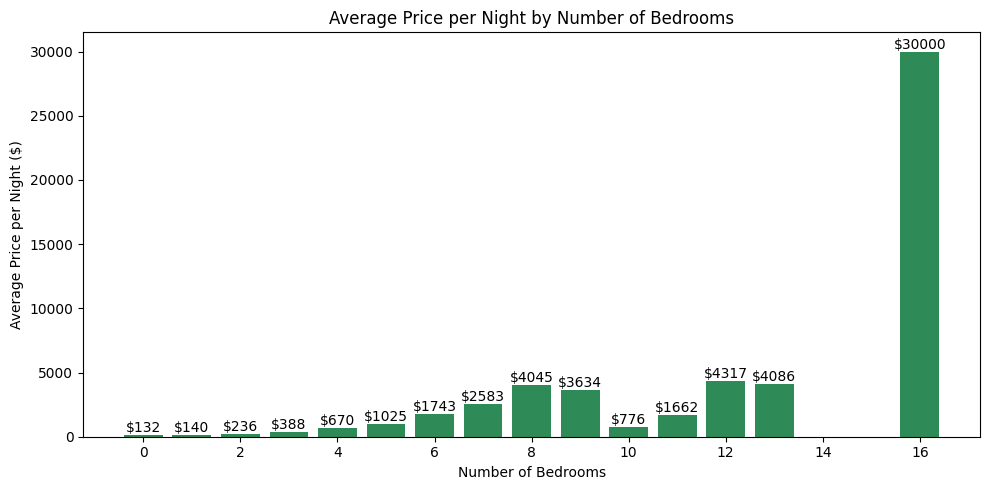

In [62]:
# Filter to only bedrooms <= 20
filtered_data = avg_price_by_bedrooms[avg_price_by_bedrooms['Bedrooms'] <= 20]

### Plotting a bar chart to showcase the average price per night by number of bedrooms ###
plt.figure(figsize=(10, 5))
bars = plt.bar(filtered_data['Bedrooms'].astype(int), filtered_data['Average Price (USD)'], color='seagreen')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Night ($)')
plt.title('Average Price per Night by Number of Bedrooms')

# Add price labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'${height:.0f}', ha='center', va='bottom')

# Force x-axis to show integer ticks only
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


In [63]:
# Group by bedrooms and calculate average revenue
avg_revenue_by_bedrooms = listings_la.groupby('bedrooms')['estimated_revenue_l365d'].mean().reset_index()
avg_revenue_by_bedrooms.columns = ['Bedrooms', 'Average Revenue (USD)']

print(avg_revenue_by_bedrooms.sort_values('Bedrooms'))


    Bedrooms  Average Revenue (USD)
0        0.0           11631.085408
1        1.0            8765.616366
2        2.0           16532.783421
3        3.0           22754.123251
4        4.0           27380.369128
5        5.0           31955.222106
6        6.0           26618.530864
7        7.0           39114.552632
8        8.0           38885.977273
9        9.0           38800.750000
10      10.0           20234.769231
11      11.0            5970.000000
12      12.0               0.000000
13      13.0               0.000000
14      16.0               0.000000
15      23.0               0.000000
16      24.0               0.000000
17      43.0               0.000000


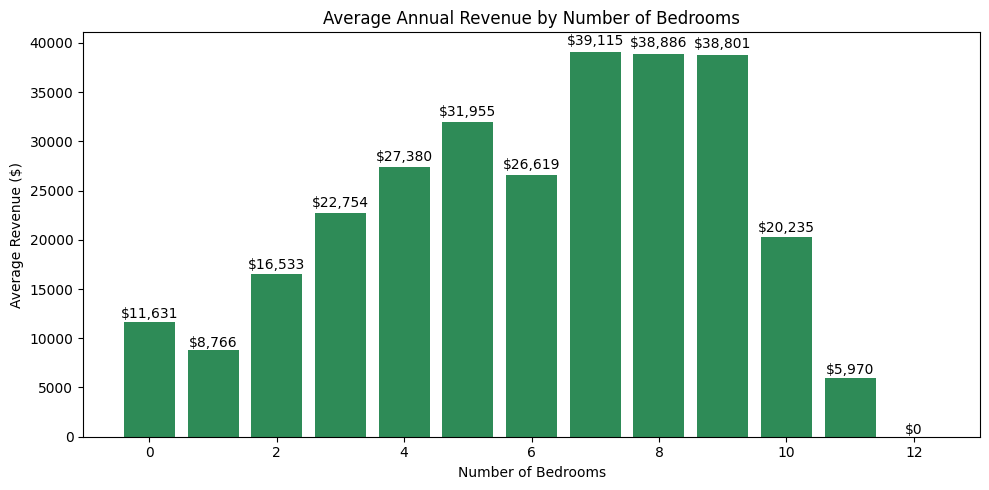

In [64]:
filtered_revenue = avg_revenue_by_bedrooms[avg_revenue_by_bedrooms['Bedrooms'] <= 12]

### Plotting a bar chart to show Average Annual Reveneu by Number of Bedrooms ###
plt.figure(figsize=(10, 5))
bars = plt.bar(filtered_revenue['Bedrooms'].astype(int), filtered_revenue['Average Revenue (USD)'], color='seagreen')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Revenue ($)')
plt.title('Average Annual Revenue by Number of Bedrooms')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + height*0.01, f'${height:,.0f}', ha='center', va='bottom')

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()
